In [81]:
import version2.video_analysis as v
import version2.speech_analysis as s
import IPython.display as ipd

### Video Analysis
1. Extract visual features
2. Convert video to audio file

In [68]:
v.extract_visual('Examples/FerrisBuellerClip.mp4')
v.video2audio('Examples/FerrisBuellerClip.mp4')

ERROR: Unable to run OpenFace.


AttributeError: module 'version2.video_analysis' has no attribute 'video2audio'

### Acoustic Analysis
1. Extract acoustic features
2. Convert audio to transcript

In [1]:
s.speech_recognizer('Examples/FerrisBuellerClip.wav')

Sphinx thinks you said if he keeps calling me because i need to come to make me feel guilty does all this ridiculous okay i'll go on go on go i'll go on go with uncle shut up


In [84]:
import importlib
importlib.reload(version2.speech_analysis)
s.extract_audio('Examples/FerrisBuellerClip.wav')

['chroma_stft', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'rmse', 'zero_crossing_rate', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'tempo']


ValueError: Shape of passed values is (19, 1), indices imply (19, 20)

In [49]:
def get_feature_vector(y,sr):
    """Extract acoustic features mean values."""
    fn_list_i = [
        feature.chroma_stft,
        feature.spectral_centroid,
        feature.spectral_bandwidth,
        feature.spectral_rolloff]
  
    fn_list_ii = [
        feature.rms,
        feature.zero_crossing_rate]
    
    feat_vect_i = [ np.mean(funct(y,sr)) for funct in fn_list_i]
    feat_vect_ii = [ np.mean(funct(y)) for funct in fn_list_ii]
    
    # Add MFCCs
    S = feature.melspectrogram(y, sr=sr)
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc = feature.mfcc(S=log_S, n_mfcc=13)
    mfcc_mean = [np.mean(x) for x in mfcc]
    
    # Add Tempo
    onset_env = librosa.onset.onset_strength(y, sr=sr)
    tempo = librosa.beat.tempo(onset_env, sr=sr)
    feature_vector =   feat_vect_i + feat_vect_ii + mfcc_mean + tempo
    return feature_vector

def get_feature_header():
    audio_feature_names =[
    'chroma_stft',
    'spectral_centroid',
    'spectral_bandwidth',
    'spectral_rolloff',
    'rmse',
    'zero_crossing_rate']
    mfccs = ['mfcc_{}'.format(x) for x in range(1,14)]
    audio_feature_names += mfccs
    audio_feature_names += 'tempo'
    return audio_feature_names

#### Load audio file

In [23]:
# time-series-array (y) and a sampling rate(sr), i.e. digital representation of the audio file
y, sr = librosa.load('Examples/FerrisBuellerClip.wav')

In [50]:
acoustic_feats = get_feature_vector(y=y,sr=sr)
acoustic_feats_names = get_feature_header()

#### Play audio file

In [24]:
ipd.Audio(y, rate=sr)

#### Dispaly Chromagram

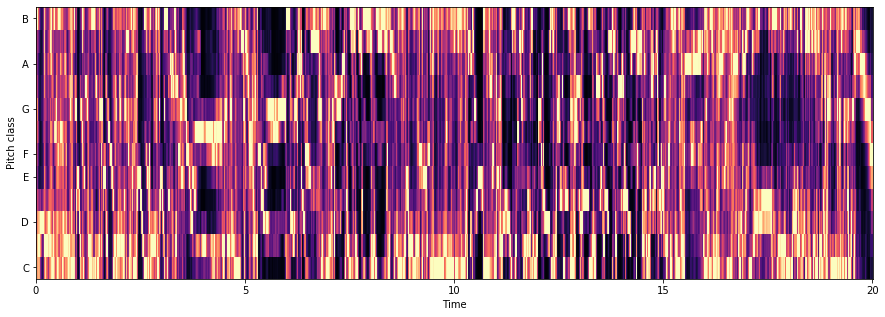

In [23]:
# Chromagram
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma')